In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Set data directory

In [2]:
data_dir = r"C:\FINAL YEAR PROJECT\digits"

# Resizing

In [3]:
IMG_SIZE = (90, 90) 
NUM_CLASSES = 10

# Function to load images and labels

In [4]:
def load_data(data_dir):
    images = []
    labels = []
    
    for label in range(NUM_CLASSES):
        path = os.path.join(data_dir, str(label))  # Each digit in a separate folder
        if not os.path.exists(path):
            continue  # Skip if folder doesn't exist
        
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
            if img is None:
                continue
            
            img = cv2.resize(img, IMG_SIZE)  # Resize
            img = img / 255.0  # Normalize (0-1)
            
            images.append(img)
            labels.append(label)
    
    images = np.array(images).reshape(-1, 90, 90, 1)  # Add channel dimension
    labels = np.array(labels)
    return images, labels


# Load dataset

In [5]:
x_data, y_data = load_data(data_dir)

# Split data into train, validation, and test sets (80% train, 10% val, 10% test)

In [6]:

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Convert labels to one-hot encoding

In [7]:
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = keras.utils.to_categorical(y_val, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

# Data Augmentation

In [8]:
datagen = ImageDataGenerator(
    rotation_range=20,  # Increase rotation
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],  # Adjust brightness
    horizontal_flip=True,
    vertical_flip=False  # Flip horizontally only if digits remain recognizable
)
datagen.fit(x_train)

# Defining Model

In [15]:
def create_vgg_model():
    model = keras.Sequential([
        keras.layers.Input(shape=(90, 90, 1)),  # Input layer

        # Block 1
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        # Block 2
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        # Block 3
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        # Block 4
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.Conv2D(512, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(2048, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    
    return model

# Create model

In [16]:
model = create_vgg_model()

# Compile model

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary

In [18]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 90, 90, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 45, 45, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 22, 22, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 22, 22, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 22, 22, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 11, 11, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2048)                │      26,216,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,958,986 (137.17 MB)

 Trainable params: 35,958,986 (137.17 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [19]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_val, y_val),
                    epochs=50,
                    verbose=1)

Epoch 1/50


C:\Users\haque\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 825ms/step - accuracy: 0.0482 - loss: 2.3028 - val_accuracy: 0.1250 - val_loss: 2.3027
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 683ms/step - accuracy: 0.0628 - loss: 2.3026 - val_accuracy: 0.1250 - val_loss: 2.3027
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 967ms/step - accuracy: 0.1056 - loss: 2.3023 - val_accuracy: 0.1250 - val_loss: 2.3029
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - accuracy: 0.1259 - loss: 2.3021 - val_accuracy: 0.1250 - val_loss: 2.3032
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 685ms/step - accuracy: 0.0899 - loss: 2.3021 - val_accuracy: 0.1250 - val_loss: 2.3034
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 684ms/step - accuracy: 0.0985 - loss: 2.3022 - val_accuracy: 0.1250 - val_loss: 2.3035
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - accuracy: 0.1024 - loss: 2.3021 - val_accuracy: 0.1250 - val_loss: 2.3036
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 913ms/step - accuracy: 0.1493 - loss: 2.3010 - val_accuracy: 0.1250 - val_loss: 2.3037
Epo

# Evaluate on test set

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.0000e+00 - loss: 2.3219
Test Accuracy: 0.0000


# Save model

In [21]:
model.save("vgg_digit_classifier.h5")
print("Model saved successfully!")

Model saved successfully!


In [37]:
img = cv2.imread('untitled.png')

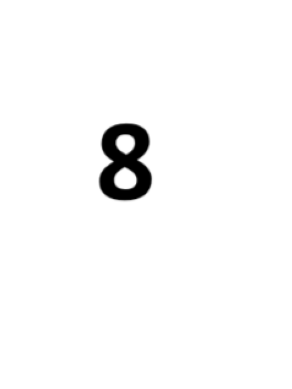

In [38]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Hide axis for better visualization
plt.show()

In [39]:
resized = cv2.resize(img, (90, 90)) 

In [40]:
resized.shape

(90, 90, 3)

In [41]:
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [42]:
newimg = np.array(newimg).reshape(-1, 90, 90, 1)

In [44]:
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [45]:
print(np.argmax(predictions))

26
